In [1]:
import data
import glob
import seaborn as sns
import numpy as np
import pandas as pd
from functools import partial
sns.set_theme()


In [2]:
dataset_params = [(100, 0.15), (75,0.15), (50,0.15), (25,0.15), (100, 0.2), (75,0.2), (50,0.2), (25,0.2), (100, 0.1), (75,0.1), (50,0.1), (25,0.1)
]

In [3]:
r=100
eps=0.15
d = pd.read_pickle(f"P{r}_{eps}.pickle")
d["r"] = r
d["eps"] = eps

132

In [4]:
from functools import reduce

def load(r,eps):
    d = pd.read_pickle(f"P{r}_{eps}")
    P_col = f"P_{r}_{eps}"
    #d.pivot(index="modelFile", columns="model_type", values=[P_col, "pns_l", "pns_u", "L"])
    d[f'warnings_{r}_{eps}'] = d["warnings"]
    d.drop("warnings", axis=1, inplace=True)
    return d.copy()

def load_long(r,eps):
    d = pd.read_pickle(f"P{r}_{eps}.pickle")
    d["r"] = r
    d["eps"] = eps
    d.rename({f"P_{r}_{eps}":"P", f"num_{r}_{eps}": "num", f"den_{r}_{eps}":"den"}, axis=1, inplace=True)
    return d.copy()


datasets = [ load_long(r,eps) for r,eps in dataset_params ]
P = pd.concat(datasets).pivot(index = ["modelFile", "model_type", "cofounded_cause"], columns=["r", "eps",], values=["P",])
P.columns = ["_".join(str(c) for c in col) for col in P.columns]

L = pd.concat(datasets).groupby(["modelFile","model_type","cofounded_cause"]).agg({"L":min, "pns_l":min, "pns_u":min})
P2 = pd.merge(P, L, on=["modelFile","model_type","cofounded_cause"])
#xx = reduce(lambda left, right: pd.concat(left,right.drop(["pns_l", "pns_u", "L", "pns"],axis=1), on=[ "modelFile", "model_type"], how='inner', suffixes=("", "_y")), datasets)


In [299]:
P2.reset_index().to_csv("P_clear23_3eps.csv")

In [5]:
P2

P_100_0.15  \
modelFile                                     model_type cofounded_cause                 
random_mc2_n10_mid3_d1000_05_mr098_r10_59.uai all        True             1.083032e+93   
                                              int        True                      NaN   
                                              obs        True             9.070659e+36   
random_mc2_n5_mid3_d1000_05_mr098_r10_11.uai  all        True                      NaN   
                                              int        True                      NaN   
...                                                                                ...   
random_mc2_n9_mid3_d1000_05_mr098_r10_89.uai  int        True             5.162727e-01   
                                              obs        True             4.512764e-01   
random_mc2_n9_mid3_d1000_05_mr098_r10_91.uai  all        True             3.933526e-01   
                                              int        True             9.002545e-01   
                                              obs        True             5.097035e-01   

                                                                             P_75_0.15  \
modelFile                                     model_type cofounded_cause                 
random_mc2_n10_mid3_d1000_05_mr098_r10_59.uai all        True             1.042018e+71   
                                              int        True                      NaN   
                                              obs        True             4.090086e+30   
random_mc2_n5_mid3_d1000_05_mr098_r10_11.uai  all        True                      NaN   
                                              int        True                      NaN   
...                                                                                ...   
random_mc2_n9_mid3_d1000_05_mr098_r10_89.uai  int        True             5.004046e-01   
                                              obs        True             2.965435e-01   
random_mc2_n9_mid3_d1000_05_mr098_r10_91.uai  all        True             3.716081e-01   
                                              int        True             8.074827e-01   
                                              obs        True             5.161189e-01   

                                                                             P_50_0.15  \
modelFile                                     model_type cofounded_cause                 
random_mc2_n10_mid3_d1000_05_mr098_r10_59.uai all        True             1.014949e+46   
                                              int        True                      NaN   
                                              obs        True             5.759633e+17   
random_mc2_n5_mid3_d1000_05_mr098_r10_11.uai  all        True                      NaN   
                                              int        True                      NaN   
...                                                                                ...   
random_mc2_n9_mid3_d1000_05_mr098_r10_89.uai  int        True             3.660482e-01   
                                              obs        True             2.248989e-01   
random_mc2_n9_mid3_d1000_05_mr098_r10_91.uai  all        True             3.355368e-01   
                                              int        True             5.869317e-01   
                                              obs        True             4.992798e-01   

                                                                              P_25_0.15  \
modelFile                                     model_type cofounded_cause                  
random_mc2_n10_mid3_d1000_05_mr098_r10_59.uai all        True              5.102304e+22   
                                              int        True             1.240297e+226   
                                              obs        True              3.787968e+06   
random_mc2_n5_mid3_d1000_05_mr098_r10_11.uai  all        True                       NaN   
                 

<AxesSubplot:>

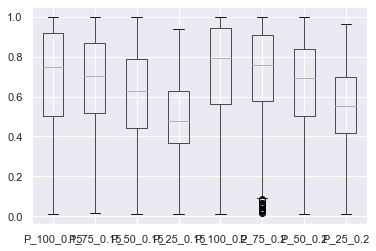

In [242]:
oldP2
oldP2[reduce(np.multiply, [oldP2[f"P_{r}_{eps}"] <= 1 for r, eps in dataset_params])][[f"P_{r}_{eps}" for r, eps in dataset_params]].boxplot()

In [264]:
xx = oldP2["P_100_0.15"] - P2["P_100_0.15"]

In [294]:
import operator

oldP2[reduce(operator.or_, [oldP2[f"P_{r}_{eps}"] > 1 for r, eps in dataset_params]) & (oldP2.L.astype(float) > 0.02)]


P_100_0.15  \
modelFile                                    model_type cofounded_cause                 
random_mc2_n5_mid3_d1000_05_mr098_r10_22.uai int        False            5.379650e+02   
                                                        True             1.011449e-01   
random_mc2_n5_mid3_d1000_05_mr098_r10_23.uai int        False            6.209993e+02   
                                             obs        False            8.451078e-03   
random_mc2_n5_mid3_d1000_05_mr098_r10_37.uai int        True             2.513088e+02   
random_mc2_n5_mid3_d1000_05_mr098_r10_4.uai  all        False            4.677010e+10   
                                             int        False            1.318712e+09   
                                             obs        False            9.409052e+08   
random_mc2_n5_mid3_d1000_05_mr098_r10_89.uai int        False            2.012403e+02   
                                                        True             6.237936e+02   
                                             obs        False            1.558182e+02   
random_mc2_n6_mid3_d1000_05_mr098_r10_15.uai int        True             2.185327e+02   
random_mc2_n6_mid3_d1000_05_mr098_r10_23.uai all        True             2.991974e+04   
                                             int        True             5.826453e+03   
random_mc2_n6_mid3_d1000_05_mr098_r10_40.uai all        False            1.995304e+03   
random_mc2_n6_mid3_d1000_05_mr098_r10_42.uai all        False            6.008603e+03   
                                             int        False            7.012689e+03   
                                             obs        False            4.114522e+03   
random_mc2_n6_mid3_d1000_05_mr098_r10_47.uai all        False            3.936125e+04   
                                             int        False            2.961913e+04   
                                             obs        False            2.436382e+08   
random_mc2_n6_mid3_d1000_05_mr098_r10_68.uai int        True             1.525998e+03   
                                             obs        True             9.162808e+02   
random_mc2_n6_mid3_d1000_05_mr098_r10_91.uai all        True             2.482324e+03   
                                             int        True             1.591310e+03   
random_mc2_n7_mid3_d1000_05_mr098_r10_29.uai all        False            4.215170e+10   
                                             int        False            2.461963e+09   
                                             obs        False            1.336783e+08   
random_mc2_n7_mid3_d1000_05_mr098_r10_46.uai all        False            6.871213e+11   
                                             int        False            1.734648e+04   
                                             obs        False            1.136061e+04   
random_mc2_n8_mid3_d1000_05_mr098_r10_2.uai  all        False            4.039181e+03   
                                             int        False            3.994560e+04   
                                             obs        False            1.020555e+00   
random_mc2_n8_mid3_d1000_05_mr098_r10_87.uai all        False            1.329363e+03   
                                             int        False            1.028866e+03   
random_mc2_n9_mid3_d1000_05_mr098_r10_42.uai obs        True             1.734303e+04   
random_mc2_n9_mid3_d1000_05_mr098_r10_45.uai all        False            7.056384e+01   

                                                                            P_75_0.15  \
modelFile                                    model_type cofounded_cause                 
random_mc2_n5_mid3_d1000_05_mr098_r10_22.uai int        False            2.190911e-01   
                                                        True             1.373098e-01   
random_mc2_n5_mid3_d1000_05_mr098_r10_23.uai int        False            1.447892e-01   
                                             obs        False        

In [290]:
all_valid = P2[reduce(np.multiply, [P2[f"P_{r}_{eps}"] <= 1 for r, eps in dataset_params])]


In [ ]:
all_valid

<AxesSubplot:>

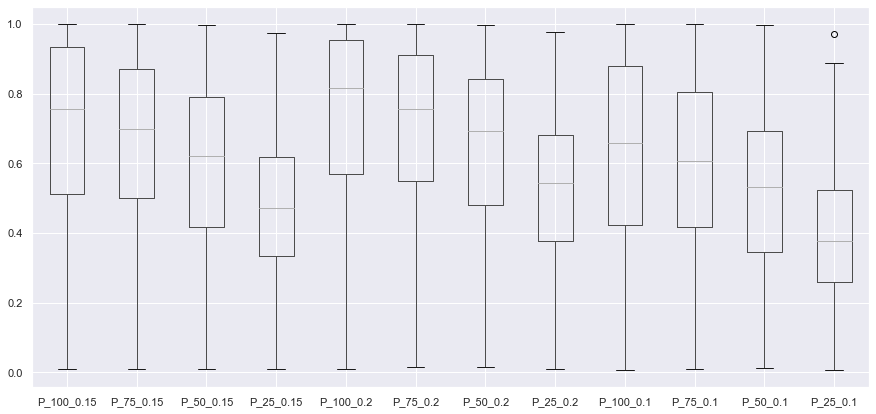

In [315]:
P2[reduce(np.multiply, [P2[f"P_{r}_{eps}"] <= 1 for r, eps in dataset_params])][[f"P_{r}_{eps}" for r, eps in dataset_params]].boxplot(figsize=(15,7))



In [309]:
sns.boxplot?

Signature:
sns.boxplot(
    *,
    x=None,
    y=None,
    hue=None,
    data=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    width=0.8,
    dodge=True,
    fliersize=5,
    linewidth=None,
    whis=1.5,
    ax=None,
    **kwargs,
)
Docstring:
Draw a box plot to show distributions with respect to categories.

A box plot (or box-and-whisker plot) shows the distribution of quantitative
data in a way that facilitates comparisons between variables or across
levels of a categorical variable. The box shows the quartiles of the
dataset while the whiskers extend to show the rest of the distribution,
except for points that are determined to be "outliers" using a method
that is a function of the inter-quartile range.


Input data can be passed in a variety of formats, including:

- Vectors of data represented as lists, numpy arrays, or pandas Series
  objects passed directly to the ``x``, ``y``, and/or ``hue`` parameters.
- A 

In [86]:
pns = d.iloc[10].pns098.astype(float)
#pns = np.concatenate((pns,pns,pns,pns,pns,pns))
np.random.shuffle(pns)

In [214]:
import operator 

In [88]:
import convergence as c

In [89]:
rs = range(10, len(pns), int(len(pns)/100))

In [90]:
P = [c.p_eps_convergence(pns[:i], 0.01)[0] for i in rs]

/Users/dhuber/anaconda3/envs/causal/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


In [92]:
mn = [min(pns[:i]) for i in rs]
mx = [max(pns[:i]) for i in rs]

<AxesSubplot:>

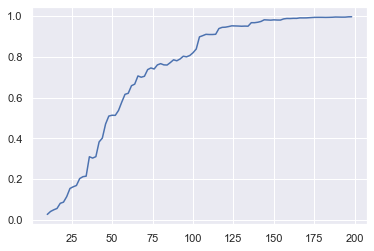

In [93]:
sns.lineplot(x=rs, y=P)



In [55]:
def minmax(samples):
    return min(samples), max(samples)

In [58]:

[minmax(pns[:i]) for i in rs]

[(0.0176965743985012, 0.1774320243856808),
 (0.0176965743985012, 0.1774320243856808),
 (0.0004396455883278248, 0.1774320243856808),
 (0.0004396455883278248, 0.1774320243856808),
 (0.0004396455883278248, 0.1774320243856808),
 (0.0004396455883278248, 0.1774320243856808),
 (0.0004396455883278248, 0.1774320243856808),
 (0.0004396455883278248, 0.1774320243856808),
 (0.0004396455883278248, 0.1774320243856808),
 (0.0004396455883278248, 0.1774320243856808),
 (0.0004396455883278248, 0.1774320243856808),
 (0.0004396455883278248, 0.1774320243856808),
 (0.0004396455883278248, 0.1774320243856808),
 (0.0004396455883278248, 0.1774320243856808),
 (0.0004396455883278248, 0.1778412743429366),
 (0.0004396455883278248, 0.1778412743429366),
 (0.0004396455883278248, 0.1778412743429366),
 (0.0004396455883278248, 0.1778412743429366),
 (0.0004396455883278248, 0.1778412743429366),
 (0.0004396455883278248, 0.1778455652717396),
 (0.0004396455883278248, 0.1778455652717396),
 (0.0004396455883278248, 0.1778455652717